In [1]:
import pandas as pd  # import the neccessary libraries
pd.set_option('display.max_columns', 300)  # display all the columns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor  # In case we want to use k-nearest neighbor model
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn')
sns.set(style="white")

In [2]:
df = pd.read_csv('graduation_train.csv')  # read in the train dataset
df.head()  # check the first 5 rows

,DBN,schoolyear,% of cohort,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,has_junior_high,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs
0,02M432,2010,76.6,0.0,60.0,141,141.0,0.0,0.0,0.0,9.2,22.7,8.5,46.1,38.3,5.7,56.7,43.3,0,0.0,0.0,0,0,0.0,1,0
1,08X405,2010,66.8,0.0,80.7,3925,1481.0,1085.0,719.0,640.0,9.7,18.7,6.8,22.5,61.3,8.8,58.9,41.1,0,0.0,0.0,0,0,0.0,1,0
2,10X433,2005,65.1,74.5,0.0,493,157.0,132.0,121.0,83.0,8.5,8.5,1.4,34.5,59.8,2.4,28.8,71.2,0,0.0,0.0,0,0,0.0,1,0
3,31R470,2008,52.4,42.9,0.0,161,5.0,72.0,84.0,0.0,6.2,11.2,2.5,26.1,50.3,21.1,42.2,57.8,0,0.0,0.0,0,0,0.0,1,0
4,18K642,2011,74.0,0.0,76.4,305,75.0,90.0,83.0,57.0,11.1,12.5,2.3,82.3,10.5,3.9,62.6,37.4,0,0.0,0.0,0,0,0.0,1,0


In [3]:
df = pd.get_dummies(df, columns = ['schoolyear'], drop_first= True)  # create dummy columns for year

In [6]:
df.head()

,DBN,% of cohort,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,has_junior_high,total_elem,total_kg,has_kg,has_elem,total_junior_high,only_hs,levels_not_hs,schoolyear_2006,schoolyear_2007,schoolyear_2008,schoolyear_2009,schoolyear_2010,schoolyear_2011,minority_per
0,02M432,76.6,0.0,60.0,141,141.0,0.0,0.0,0.0,9.2,22.7,8.5,46.1,38.3,5.7,56.7,43.3,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,1,0,92.9
1,08X405,66.8,0.0,80.7,3925,1481.0,1085.0,719.0,640.0,9.7,18.7,6.8,22.5,61.3,8.8,58.9,41.1,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,1,0,90.6
2,10X433,65.1,74.5,0.0,493,157.0,132.0,121.0,83.0,8.5,8.5,1.4,34.5,59.8,2.4,28.8,71.2,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,0,0,95.7
3,31R470,52.4,42.9,0.0,161,5.0,72.0,84.0,0.0,6.2,11.2,2.5,26.1,50.3,21.1,42.2,57.8,0,0.0,0.0,0,0,0.0,1,0,0,0,1,0,0,0,78.9
4,18K642,74.0,0.0,76.4,305,75.0,90.0,83.0,57.0,11.1,12.5,2.3,82.3,10.5,3.9,62.6,37.4,0,0.0,0.0,0,0,0.0,1,0,0,0,0,0,0,1,95.1


In [5]:
# create a columns to aggregate minority students percentage
df['minority_per'] = df['asian_per'] + df['black_per'] + df['hispanic_per']

In [9]:
df['minority_per'].mean()

90.38820840950659

In [10]:
df.isnull().sum().any()  # check if there are any missing values

False

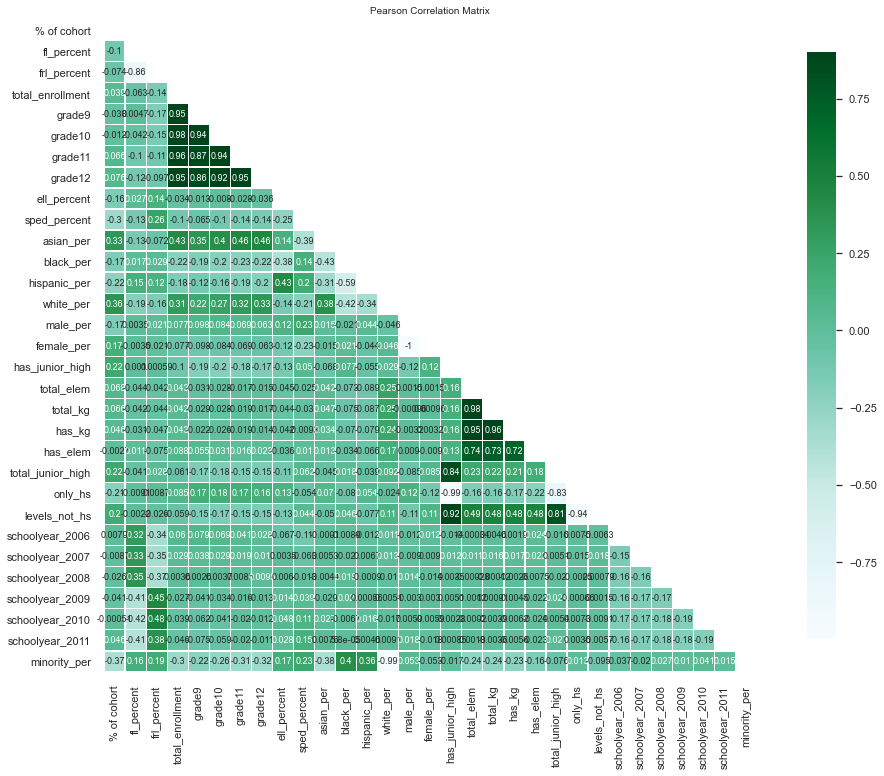

In [12]:
# let's check the correlation between the features

mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 12))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.9,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

## Train - Test Split
___

In [19]:
df_features = df.drop(columns = ['DBN','% of cohort'])

target = df['% of cohort']

In [20]:
train_X, test_X, train_y, test_y = train_test_split(df_features, target, random_state=9,test_size=0.25)

In [21]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(train_X)

#transform the training data
train_X = pd.DataFrame(data=scaler.transform(train_X), columns=df_features.columns)

#transform the testing data
test_X = pd.DataFrame(data=scaler.transform(test_X), columns=df_features.columns)

In [22]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(train_X, train_y)

train_y_pred = lm.predict(train_X
                         )
train_rmse = np.sqrt(metrics.mean_squared_error(train_y, train_y_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 13.123691263569956


### Evaluate on the test set

In [23]:
#use fitted model to predict on the test examples
test_y_pred = lm.predict(test_X)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(test_y, test_y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 12.213930727660568
Training:  13 vs. Testing:  12
